In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use(['paper.mplstyle'])

In [2]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

# plt.style.use(['paper.mplstyle'])
text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles



# axes.spines.right   : False
# axes.spines.top     : False
mpl.rcParams['axes.spines.right'] =  False
mpl.rcParams['axes.spines.top'] =  False
# matplotlib.rc('axes.spines.top', set_visible=False)
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})



In [3]:
rad = 5.0
diff_dir = f"/home/mmcs3/code/why-prep-2/2D_nets/nonnormal"
sum_dir = f"/home/mmcs3/code/why-prep-2/2D_nets/nonnormal"
def get_us(dir, rad, c):
    return np.loadtxt(f"{dir}/c_{c}/us_{rad}_{c}")

def get_rates(dir, rad, c):
    return np.loadtxt(f"{dir}/c_{c}/rates_{rad}_{c}")

def get_thetas(dir,rad, c):
    return np.loadtxt(f"{dir}/c_{c}/thetas_{rad}_{c}")

def get_torques(dir, rad, c):
    return np.loadtxt(f"{dir}/c_{c}/torques_{rad}_{c}")

def get_projs(dir, t=300, mode="x"):
    return np.loadtxt(f"{dir}/c_{c}/proj_modes_{mode}_{t}")

def get_proj_ctr(dir, c, t=300,mode="x"):
    return np.loadtxt(f"{dir}/c_{c}/proj_ctr_{mode}_{t}")

def get_proj_obs(dir, c, t=300, mode="x"):
    return np.loadtxt(f"{dir}/c_{c}/proj_obs_{mode}_{t}")


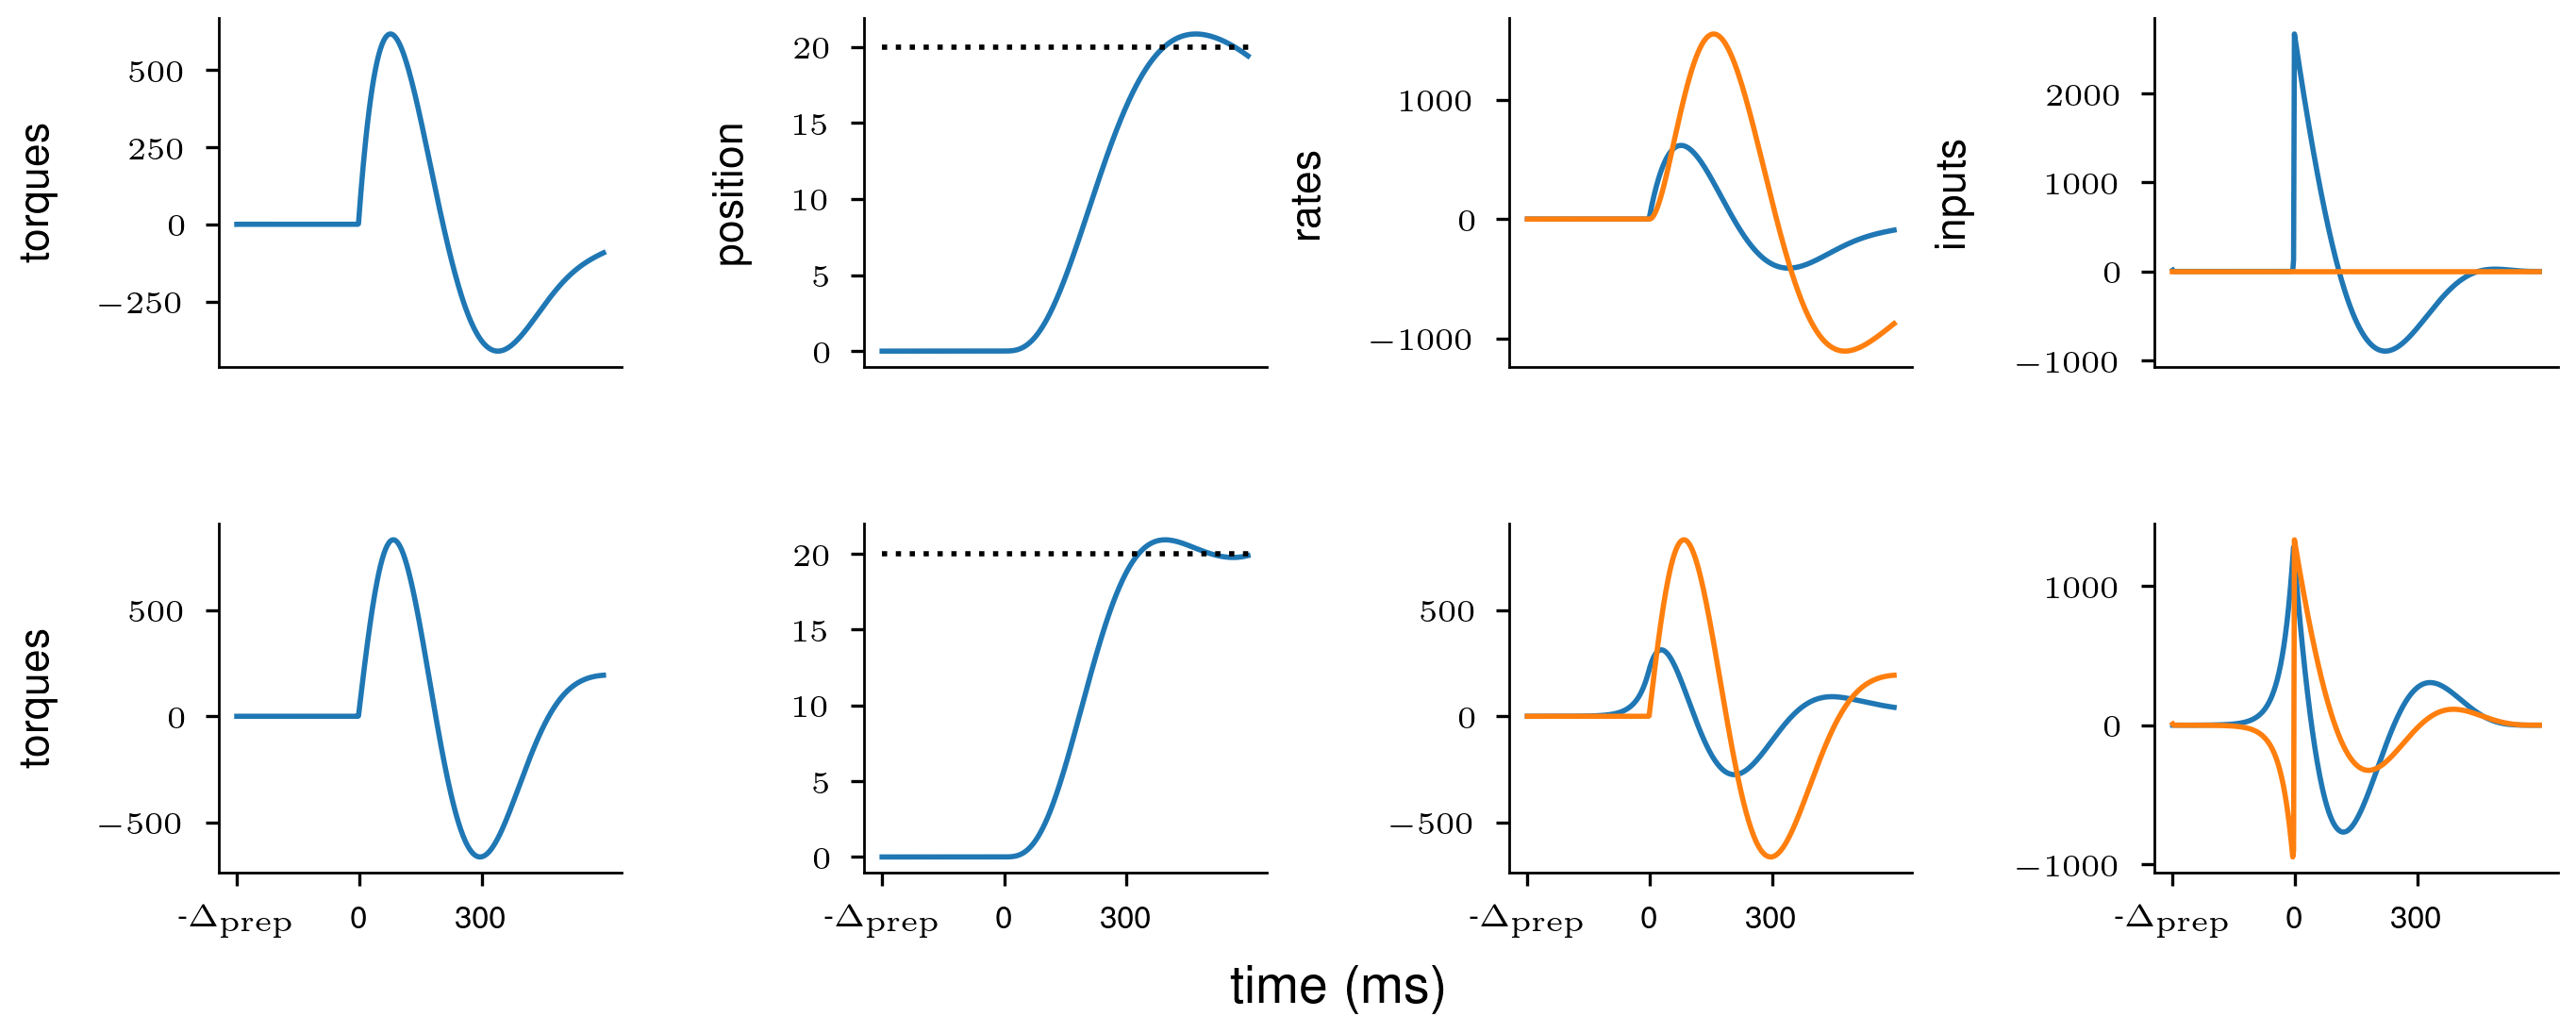

In [4]:
fig, axes = plt.subplots(2,4, figsize=(8,3),dpi=400)
plt.subplots_adjust(hspace=0.45, wspace=0.6)
t_prep = 300
axes[0,0].plot(get_torques(diff_dir, rad, c=0))
axes[0,0].set_ylabel("torques")
axes[0,0].set_xticks([])
axes[0,1].plot(get_thetas(diff_dir, rad, c=0)[:,0])
axes[0,1].set_ylabel("position")
axes[0,1].set_xticks([])
axes[0,1].hlines(20, 0, 450, color = "k", linestyle="dotted")
axes[0,2].plot(get_rates(diff_dir, rad, c=0))
axes[0,2].set_ylabel("rates")
axes[0,2].set_xticks([])
axes[0,3].plot(get_us(diff_dir, rad, c=0))
axes[0,3].set_ylabel("inputs")
axes[0,3].set_xticks([])
axes[1,0].plot(get_torques(sum_dir, rad, c=4))
axes[1,0].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
axes[1,0].set_ylabel("torques")
axes[1,1].plot(get_thetas(sum_dir, rad, c=4)[:,0])
axes[1,1].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
axes[1,1].hlines(20, 0, 450, color = "k", linestyle="dotted")
axes[1,2].plot(get_rates(sum_dir, rad, c=4))
axes[1,2].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
axes[1,3].plot(get_us(sum_dir, rad, c=4))
axes[1,3].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
fig.text(0.46, 0.01, "time (ms)")
fig.savefig(f"2D_figs/beh_{rad}.pdf", format = "pdf", bbox_inches='tight')
 

In [5]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
t_prep = 100


####C aligned along diff mode
proj_obs = get_proj_obs(diff_dir, t_prep)
proj_ctr = get_proj_ctr(diff_dir, t_prep)

fig, axes = plt.subplots(2,5, figsize=(12,3),dpi=400)
plt.subplots_adjust(hspace=0.45, wspace=0.45)
palette = sns.color_palette("YlOrBr",int(t_prep/2)+300)
palette_u = sns.color_palette("magma_r",int(t_prep/2)+300)
for i in range(np.shape(get_projs(diff_dir,t_prep))[0]):
    axes[0,1].scatter(get_projs(diff_dir,t_prep)[i,0], get_projs(diff_dir,t_prep)[i,1], color=palette[i], s=0.1)
axes[0,1].scatter(get_projs(diff_dir,t_prep)[int(t_prep/2),0], get_projs(diff_dir,t_prep)[int(t_prep/2),1], c='k', marker="x")
axes[0,1].set_xlabel("Sum mode")
axes[0,1].set_ylabel("Difference mode")



for i in range(np.shape(get_projs(sum_dir, t_prep))[0]):
    axes[0,2].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette[i], s=0.1)
axes[0,2].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[0,2].set_xlabel("Top controllable")
axes[0,2].set_ylabel("Top observable")

##########U projections
proj_obs = get_proj_obs(diff_dir, t_prep, "u")
proj_ctr = get_proj_ctr(diff_dir, t_prep, "u")
for i in range(np.shape(get_projs(diff_dir,t_prep))[0]):
    axes[0,3].scatter(get_projs(diff_dir,t_prep, "u")[i,0], get_projs(diff_dir,t_prep, "u")[i,1], color=palette_u[i], s=0.1)
axes[0,3].scatter(get_projs(diff_dir,t_prep, "u")[int(t_prep/2),0], get_projs(diff_dir,t_prep, "u")[int(t_prep/2),1], c='k', marker="x")
axes[0,3].set_xlabel("Sum mode")
axes[0,3].set_ylabel("Difference mode")



for i in range(np.shape(get_projs(sum_dir, t_prep))[0]):
    axes[0,4].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette_u[i], s=0.1)
axes[0,4].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[0,4].set_xlabel("Top controllable")
axes[0,4].set_ylabel("Top observable")


###C aligned along sum mode
proj_obs = get_proj_obs(sum_dir, t_prep)
proj_ctr = get_proj_ctr(sum_dir, t_prep)

for i in range(np.shape(get_projs(sum_dir,t_prep))[0]):
    axes[1,1].scatter(get_projs(sum_dir,t_prep)[i,0], get_projs(sum_dir,t_prep)[i,1], color=palette[i], s=0.1)
axes[1,1].scatter(get_projs(sum_dir,t_prep)[int(t_prep/2),0], get_projs(sum_dir,t_prep)[int(t_prep/2),1], c='k', marker="x")
axes[1,1].set_xlabel("Sum mode")
axes[1,1].set_ylabel("Difference mode")


for i in range(np.shape(get_projs(diff_dir, t_prep))[0]):
    axes[1,2].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette[i], s=0.1)
axes[1,2].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[1,2].set_xlabel("Top controllable")
axes[1,2].set_ylabel("Top observable")

##########U projections
proj_obs = get_proj_obs(sum_dir, t_prep, "u")
proj_ctr = get_proj_ctr(sum_dir, t_prep, "u")
for i in range(np.shape(get_projs(sum_dir,t_prep))[0]):
    axes[1,3].scatter(get_projs(sum_dir,t_prep, "u")[i,0], get_projs(sum_dir,t_prep, "u")[i,1], color=palette_u[i], s=0.1)
axes[1,3].scatter(get_projs(sum_dir,t_prep, "u")[int(t_prep/2),0], get_projs(sum_dir,t_prep, "u")[int(t_prep/2),1], c='k', marker="x")
axes[1,3].set_xlabel("Sum mode")
axes[1,3].set_ylabel("Difference mode")



for i in range(np.shape(get_projs(sum_dir, t_prep))[0]):
    axes[1,4].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette_u[i], s=0.1)
axes[1,4].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[1,4].set_xlabel("Top controllable")
axes[1,4].set_ylabel("Top observable")



# axes[0,0].arrow(0,0,1,1, head_width = 0.03)

###Plotting the arrows
pos0 = axes[0,0].get_position()
axes[0,0].set_position([pos0.x0 + 0.05, pos0.y0, pos0.width - 0.05, pos0.height - 0.02])
axes[0,0].arrow(0,0,0,1.1, head_width = 0.03, color="b", label="Readout")
axes[0,0].arrow(0,0,0,1, head_width = 0.03, color="y", label="Top observable")
axes[0,0].arrow(0,0,1,0, head_width = 0.03, color="red", label="Top controllable")
axes[0,0].set_xlabel("Sum mode")
axes[0,0].set_ylabel("Difference mode")
###Projs along sum mode
pos1 = axes[1,0].get_position()
axes[1,0].set_xlabel("Sum mode")
axes[1,0].set_ylabel("Difference mode")
axes[1,0].set_position([pos1.x0 + 0.05, pos1.y0, pos1.width - 0.05, pos1.height - 0.02])
obs_modes = np.loadtxt(f"{sum_dir}/obs_modes_x_{t_prep}")
ctr_modes = np.loadtxt(f"{sum_dir}/ctr_modes_x_{t_prep}")
axes[1,0].arrow(0,0,1.1,0, head_width = 0.03, color="b", label="Readout")
axes[1,0].arrow(0,0,-obs_modes[0,0], -obs_modes[0,1],  head_width = 0.03,color="y",label="Top obs")
axes[1,0].arrow(0,0,-ctr_modes[0,0], -ctr_modes[0,1],  head_width = 0.03,color="red",label="Top ctr")
axes[1,0].legend(loc = (0.3,0.5))
fig.savefig(f"2D_figs/projs_{rad}.pdf", format = "pdf", bbox_inches='tight')

FileNotFoundError: /home/mmcs3/code/why-prep-2/2D_nets/nonnormal/c_100/proj_obs_x_300 not found.

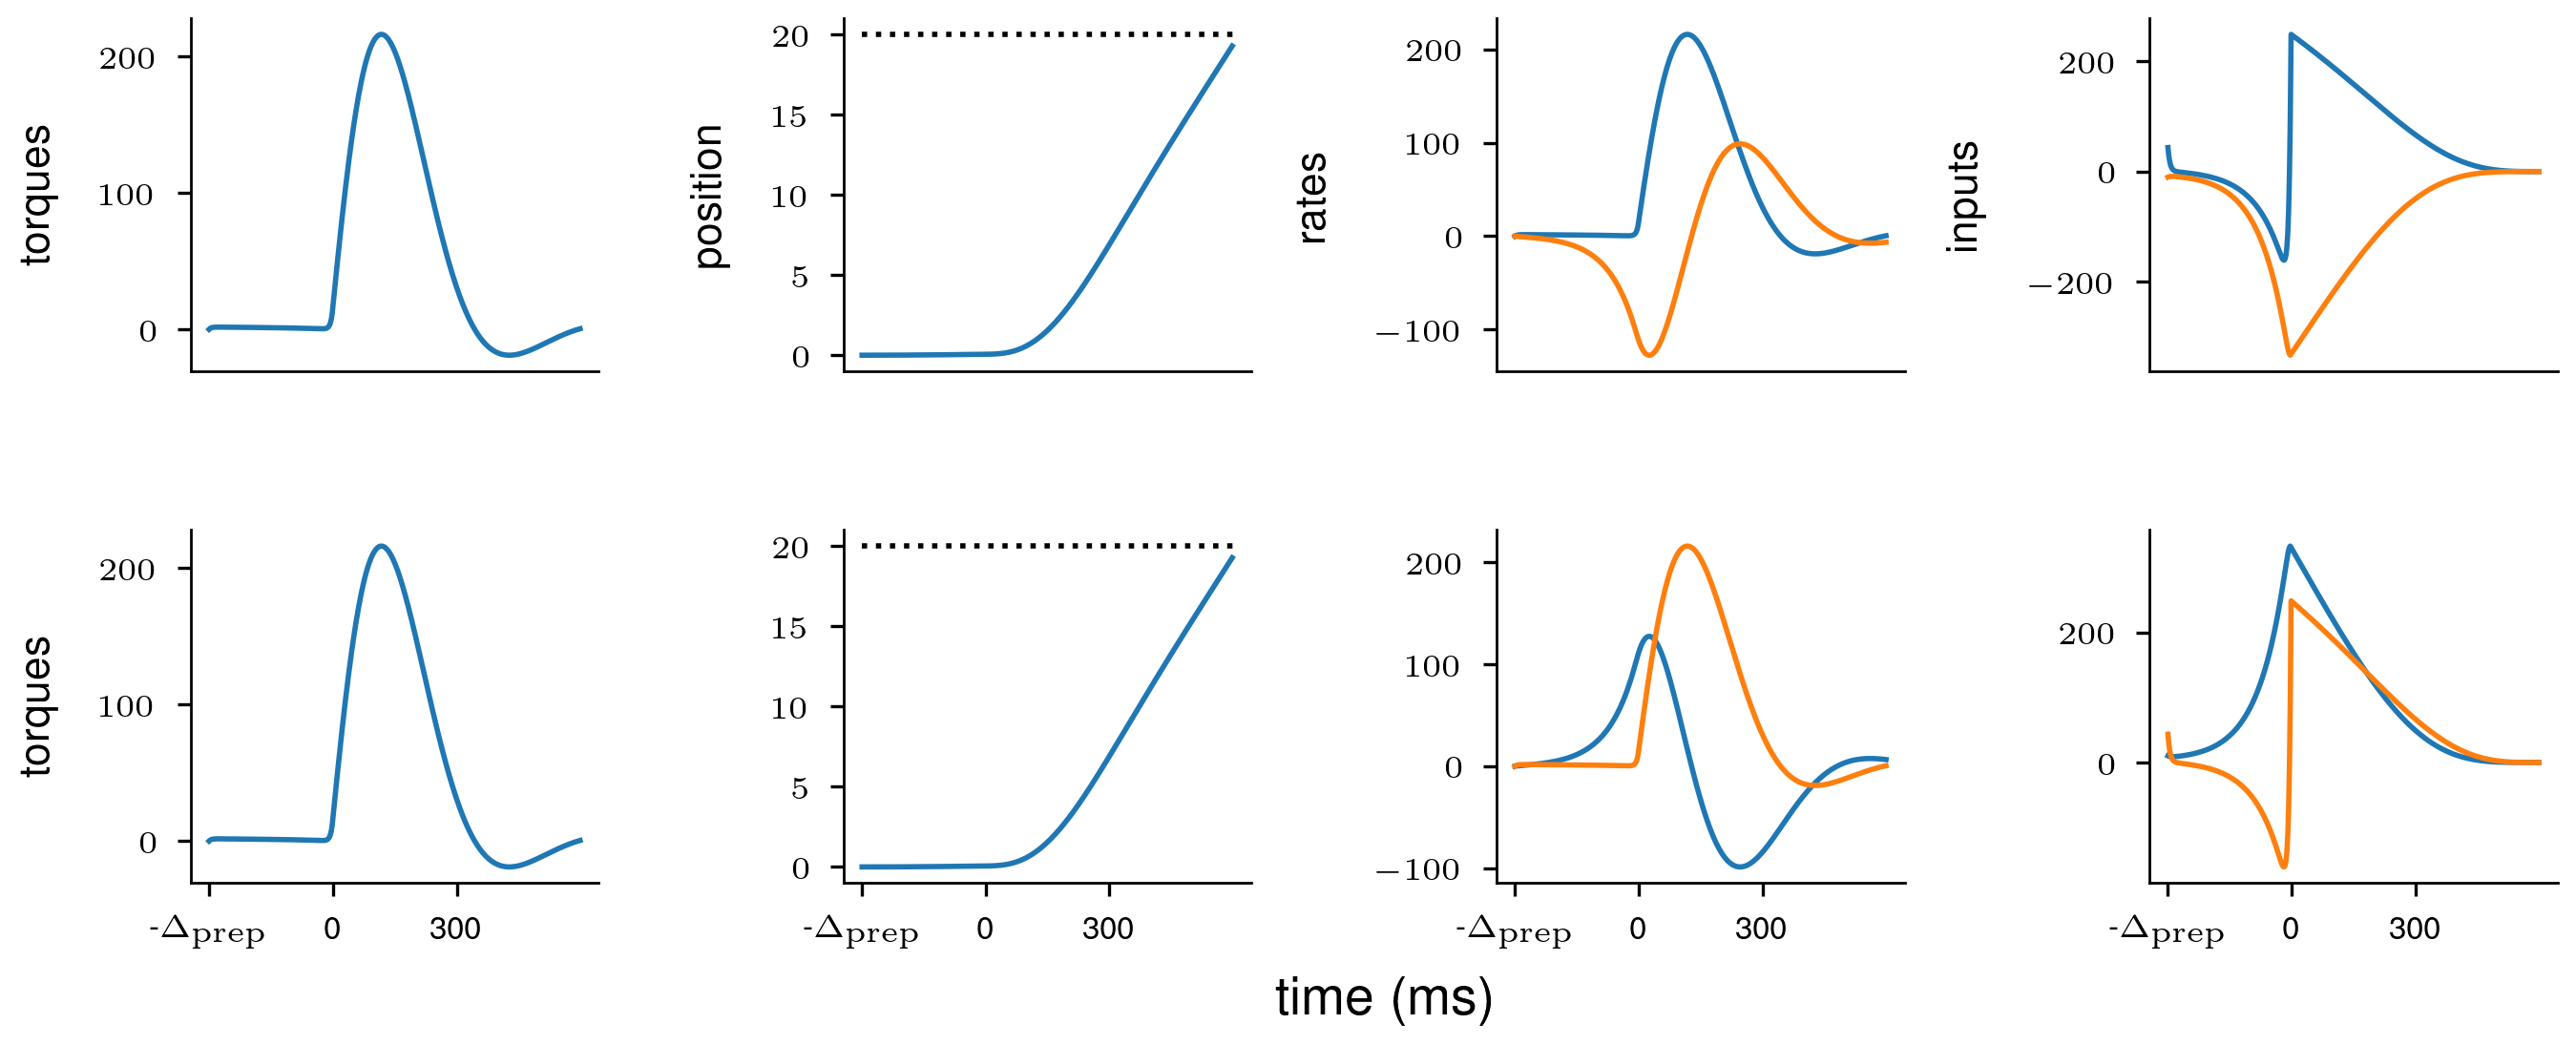

In [ ]:
diff_dir = "/home/mmcs3/code/why-prep-2/2D_skew_2/c_pc1"
sum_dir = "/home/mmcs3/code/why-prep-2/2D_skew_2/c_pc2"
fig, axes = plt.subplots(2,4, figsize=(8,3),dpi=400)
plt.subplots_adjust(hspace=0.45, wspace=0.6)
t_prep = 300
axes[0,0].plot(get_torques(diff_dir, t_prep))
axes[0,0].set_ylabel("torques")
axes[0,0].set_xticks([])
axes[0,1].plot(get_thetas(diff_dir, t_prep)[:,0])
axes[0,1].set_ylabel("position")
axes[0,1].set_xticks([])
axes[0,1].hlines(20, 0, 450, color = "k", linestyle="dotted")
axes[0,2].plot(get_rates(diff_dir, t_prep))
axes[0,2].set_ylabel("rates")
axes[0,2].set_xticks([])
axes[0,3].plot(get_us(diff_dir, t_prep))
axes[0,3].set_ylabel("inputs")
axes[0,3].set_xticks([])
axes[1,0].plot(get_torques(sum_dir, t_prep))
axes[1,0].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
axes[1,0].set_ylabel("torques")
axes[1,1].plot(get_thetas(sum_dir, t_prep)[:,0])
axes[1,1].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
axes[1,1].hlines(20, 0, 450, color = "k", linestyle="dotted")
axes[1,2].plot(get_rates(sum_dir, t_prep))
axes[1,2].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
axes[1,3].plot(get_us(sum_dir, t_prep))
axes[1,3].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
fig.text(0.48, 0.01, "time (ms)")
fig.savefig("2D_figs/skew_beh.pdf", format = "pdf", bbox_inches='tight')
 

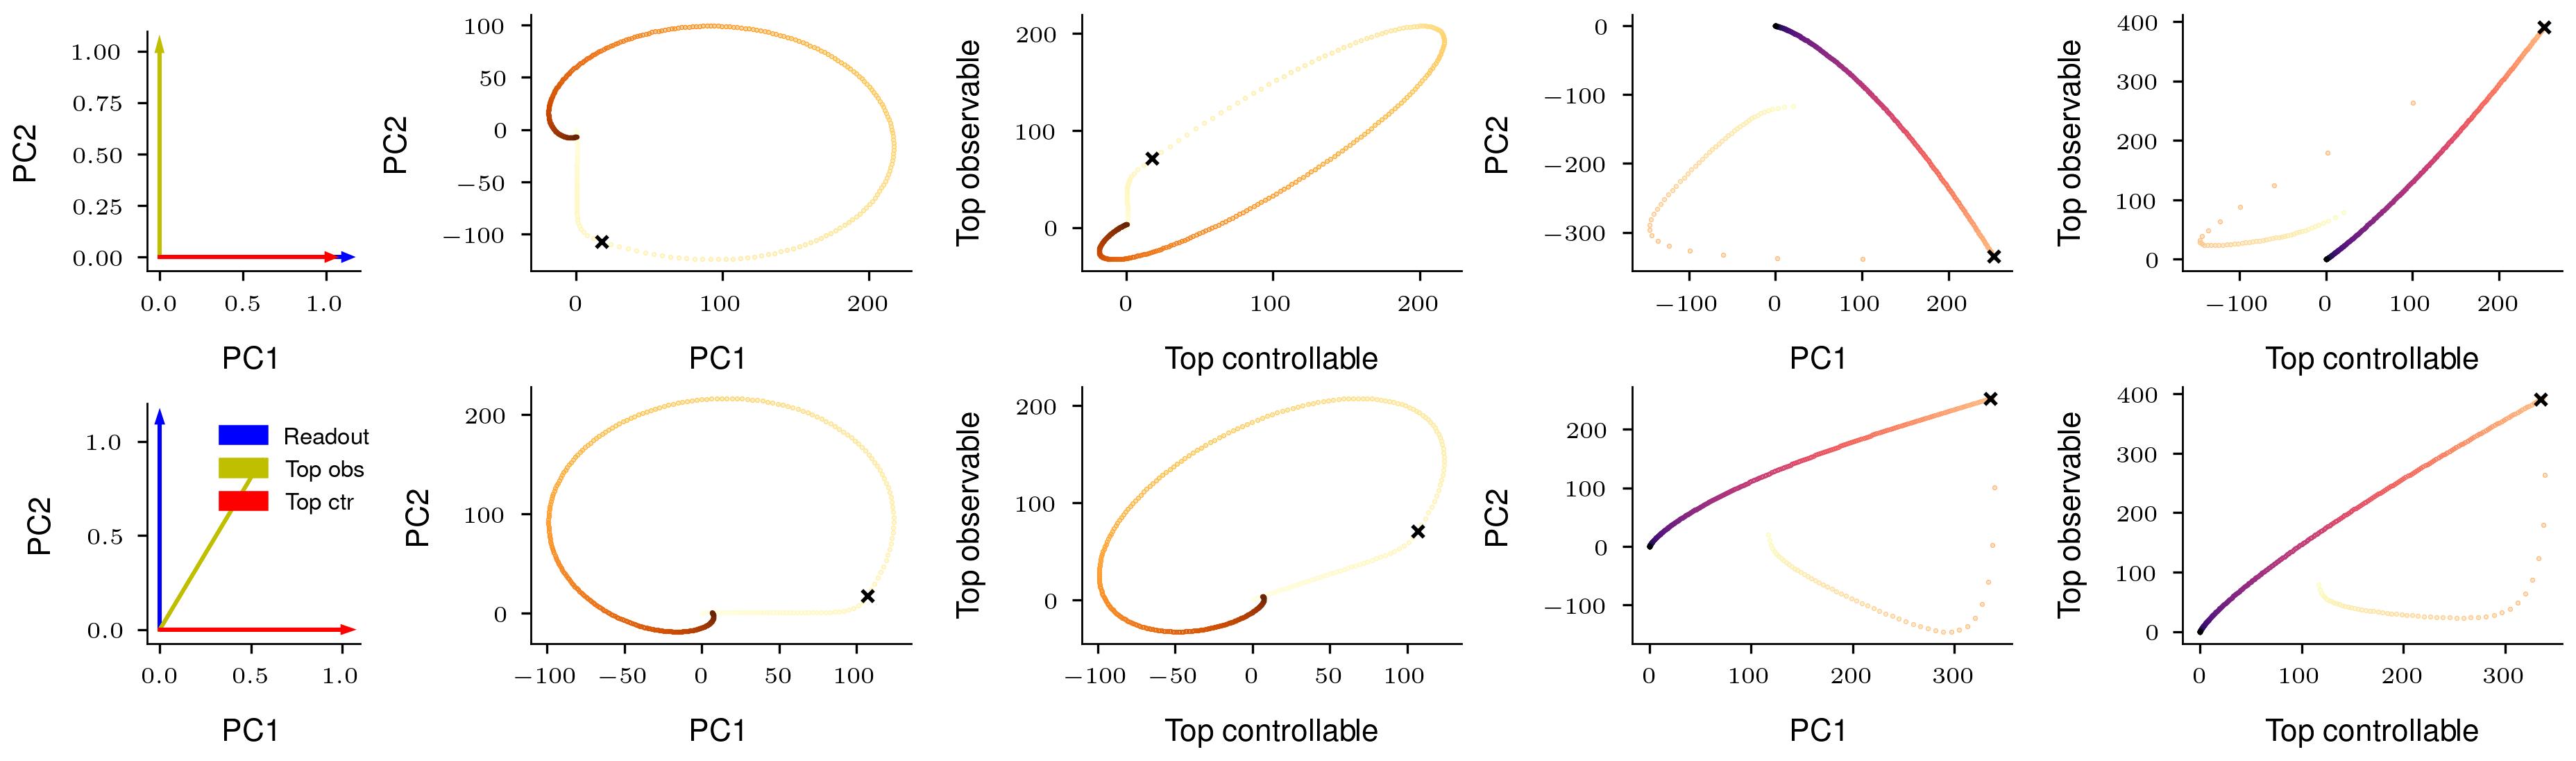

In [ ]:

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
t_prep = 100


####C aligned along diff mode
proj_obs = get_proj_obs(diff_dir, t_prep)
proj_ctr = get_proj_ctr(diff_dir, t_prep)

fig, axes = plt.subplots(2,5, figsize=(12,3),dpi=400)
plt.subplots_adjust(hspace=0.45, wspace=0.45)
palette = sns.color_palette("YlOrBr",int(t_prep/2)+300)
palette_u = sns.color_palette("magma_r",int(t_prep/2)+300)
for i in range(np.shape(get_projs(diff_dir,t_prep))[0]):
    axes[0,1].scatter(get_projs(diff_dir,t_prep)[i,0], get_projs(diff_dir,t_prep)[i,1], color=palette[i], s=0.1)
axes[0,1].scatter(get_projs(diff_dir,t_prep)[int(t_prep/2),0], get_projs(diff_dir,t_prep)[int(t_prep/2),1], c='k', marker="x")
axes[0,1].set_xlabel("PC1")
axes[0,1].set_ylabel("PC2")



for i in range(np.shape(get_projs(sum_dir, t_prep))[0]):
    axes[0,2].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette[i], s=0.1)
axes[0,2].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[0,2].set_xlabel("Top controllable")
axes[0,2].set_ylabel("Top observable")

##########U projections
proj_obs = get_proj_obs(diff_dir, t_prep, "u")
proj_ctr = get_proj_ctr(diff_dir, t_prep, "u")
for i in range(np.shape(get_projs(diff_dir,t_prep))[0]):
    axes[0,3].scatter(get_projs(diff_dir,t_prep, "u")[i,0], get_projs(diff_dir,t_prep, "u")[i,1], color=palette_u[i], s=0.1)
axes[0,3].scatter(get_projs(diff_dir,t_prep, "u")[int(t_prep/2),0], get_projs(diff_dir,t_prep, "u")[int(t_prep/2),1], c='k', marker="x")
axes[0,3].set_xlabel("PC1")
axes[0,3].set_ylabel("PC2")



for i in range(np.shape(get_projs(sum_dir, t_prep))[0]):
    axes[0,4].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette_u[i], s=0.1)
axes[0,4].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[0,4].set_xlabel("Top controllable")
axes[0,4].set_ylabel("Top observable")


###C aligned along sum mode
proj_obs = get_proj_obs(sum_dir, t_prep)
proj_ctr = get_proj_ctr(sum_dir, t_prep)

for i in range(np.shape(get_projs(sum_dir,t_prep))[0]):
    axes[1,1].scatter(get_projs(sum_dir,t_prep)[i,0], get_projs(sum_dir,t_prep)[i,1], color=palette[i], s=0.1)
axes[1,1].scatter(get_projs(sum_dir,t_prep)[int(t_prep/2),0], get_projs(sum_dir,t_prep)[int(t_prep/2),1], c='k', marker="x")
axes[1,1].set_xlabel("PC1")
axes[1,1].set_ylabel("PC2")


for i in range(np.shape(get_projs(diff_dir, t_prep))[0]):
    axes[1,2].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette[i], s=0.1)
axes[1,2].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[1,2].set_xlabel("Top controllable")
axes[1,2].set_ylabel("Top observable")

##########U projections
proj_obs = get_proj_obs(sum_dir, t_prep, "u")
proj_ctr = get_proj_ctr(sum_dir, t_prep, "u")
for i in range(np.shape(get_projs(sum_dir,t_prep))[0]):
    axes[1,3].scatter(get_projs(sum_dir,t_prep, "u")[i,0], get_projs(sum_dir,t_prep, "u")[i,1], color=palette_u[i], s=0.1)
axes[1,3].scatter(get_projs(sum_dir,t_prep, "u")[int(t_prep/2),0], get_projs(sum_dir,t_prep, "u")[int(t_prep/2),1], c='k', marker="x")
axes[1,3].set_xlabel("PC1")
axes[1,3].set_ylabel("PC2")



for i in range(np.shape(get_projs(sum_dir, t_prep))[0]):
    axes[1,4].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette_u[i], s=0.1)
axes[1,4].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[1,4].set_xlabel("Top controllable")
axes[1,4].set_ylabel("Top observable")



# axes[0,0].arrow(0,0,1,1, head_width = 0.03)

###Plotting the arrows
pos0 = axes[0,0].get_position()
axes[0,0].set_position([pos0.x0 + 0.05, pos0.y0, pos0.width - 0.05, pos0.height - 0.02])
axes[0,0].arrow(0,0,1.1,0, head_width = 0.03, color="b", label="Readout")
axes[0,0].arrow(0,0,0,1, head_width = 0.03, color="y", label="Top observable")
axes[0,0].arrow(0,0,1,0, head_width = 0.03, color="red", label="Top controllable")
axes[0,0].set_xlabel("PC1")
axes[0,0].set_ylabel("PC2")
###Projs along sum mode
pos1 = axes[1,0].get_position()
axes[1,0].set_xlabel("PC1")
axes[1,0].set_ylabel("PC2")
axes[1,0].set_position([pos1.x0 + 0.05, pos1.y0, pos1.width - 0.05, pos1.height - 0.02])
obs_modes = np.loadtxt(f"{sum_dir}/obs_modes_x_{t_prep}")
ctr_modes = np.loadtxt(f"{sum_dir}/ctr_modes_x_{t_prep}")
axes[1,0].arrow(0,0,0,1.1, head_width = 0.03, color="b", label="Readout")
axes[1,0].arrow(0,0,-obs_modes[0,0], -obs_modes[0,1],  head_width = 0.03,color="y",label="Top obs")
axes[1,0].arrow(0,0,-ctr_modes[0,0], -ctr_modes[0,1],  head_width = 0.03,color="red",label="Top ctr")
axes[1,0].legend(loc = (0.3,0.5))
fig.savefig("2D_figs/skew_projs.pdf", format = "pdf", bbox_inches='tight')

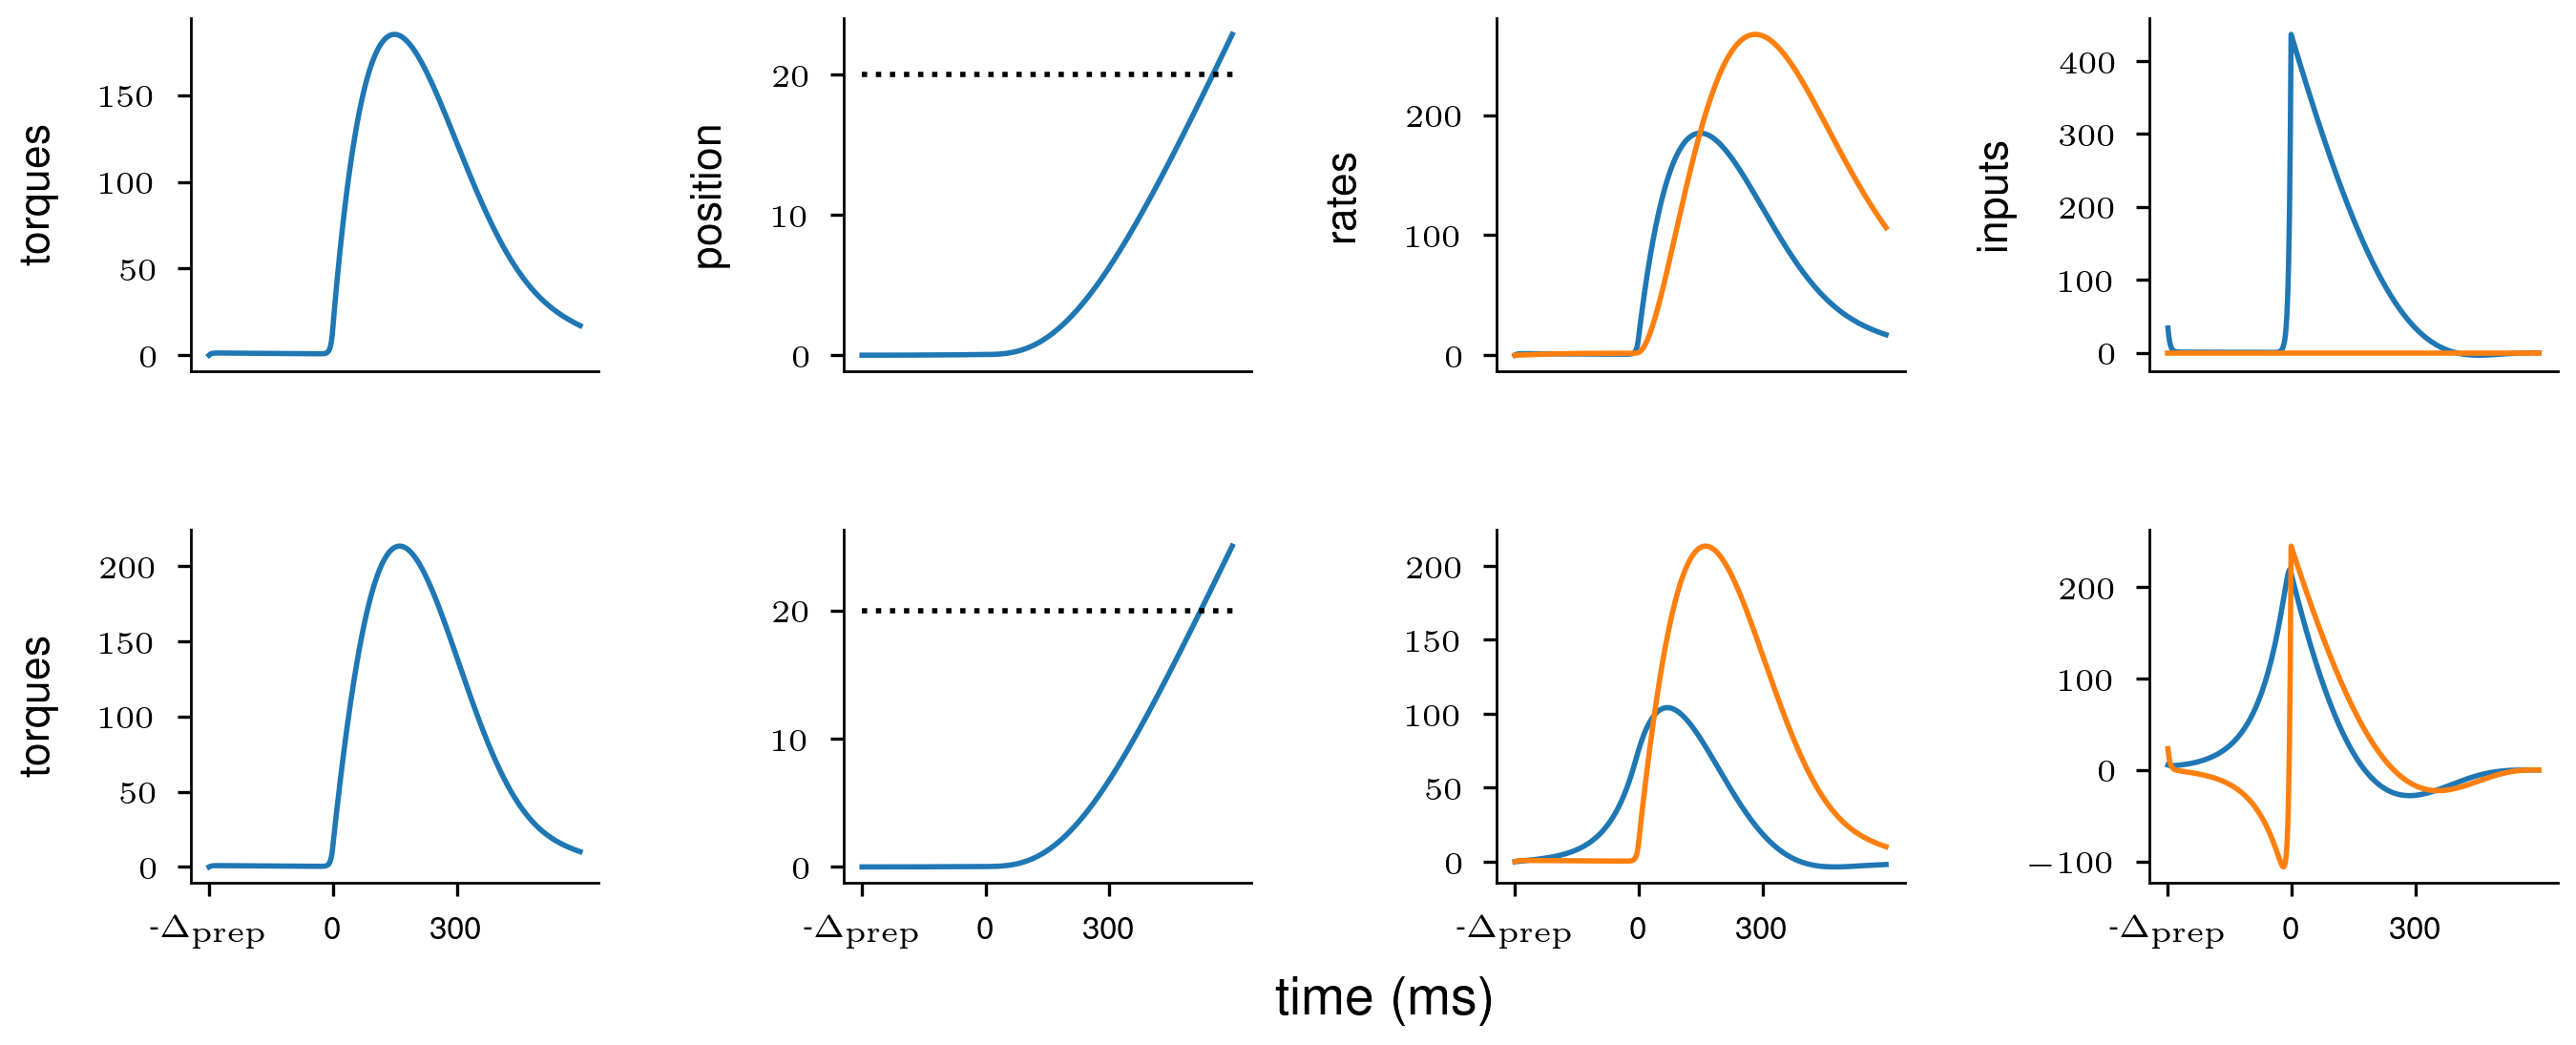

In [ ]:
diff_dir = "/home/mmcs3/code/why-prep-2/2D_nonnorm_2/c_pc1"
sum_dir = "/home/mmcs3/code/why-prep-2/2D_nonnorm_2/c_pc2"
fig, axes = plt.subplots(2,4, figsize=(8,3),dpi=400)
plt.subplots_adjust(hspace=0.45, wspace=0.6)
t_prep = 300
axes[0,0].plot(get_torques(diff_dir, t_prep))
axes[0,0].set_ylabel("torques")
axes[0,0].set_xticks([])
axes[0,1].plot(get_thetas(diff_dir, t_prep)[:,0])
axes[0,1].set_ylabel("position")
axes[0,1].set_xticks([])
axes[0,1].hlines(20, 0, 450, color = "k", linestyle="dotted")
axes[0,2].plot(get_rates(diff_dir, t_prep))
axes[0,2].set_ylabel("rates")
axes[0,2].set_xticks([])
axes[0,3].plot(get_us(diff_dir, t_prep))
axes[0,3].set_ylabel("inputs")
axes[0,3].set_xticks([])
axes[1,0].plot(get_torques(sum_dir, t_prep))
axes[1,0].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
axes[1,0].set_ylabel("torques")
axes[1,1].plot(get_thetas(sum_dir, t_prep)[:,0])
axes[1,1].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
axes[1,1].hlines(20, 0, 450, color = "k", linestyle="dotted")
axes[1,2].plot(get_rates(sum_dir, t_prep))
axes[1,2].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
axes[1,3].plot(get_us(sum_dir, t_prep))
axes[1,3].set_xticks([0,int(t_prep/2),int(t_prep/2)+150], ["-$\\Delta_{\\textrm{prep}}$", 0, 300])
fig.text(0.48, 0.01, "time (ms)")
fig.savefig("2D_figs/nonnorm_beh.pdf", format = "pdf", bbox_inches='tight')


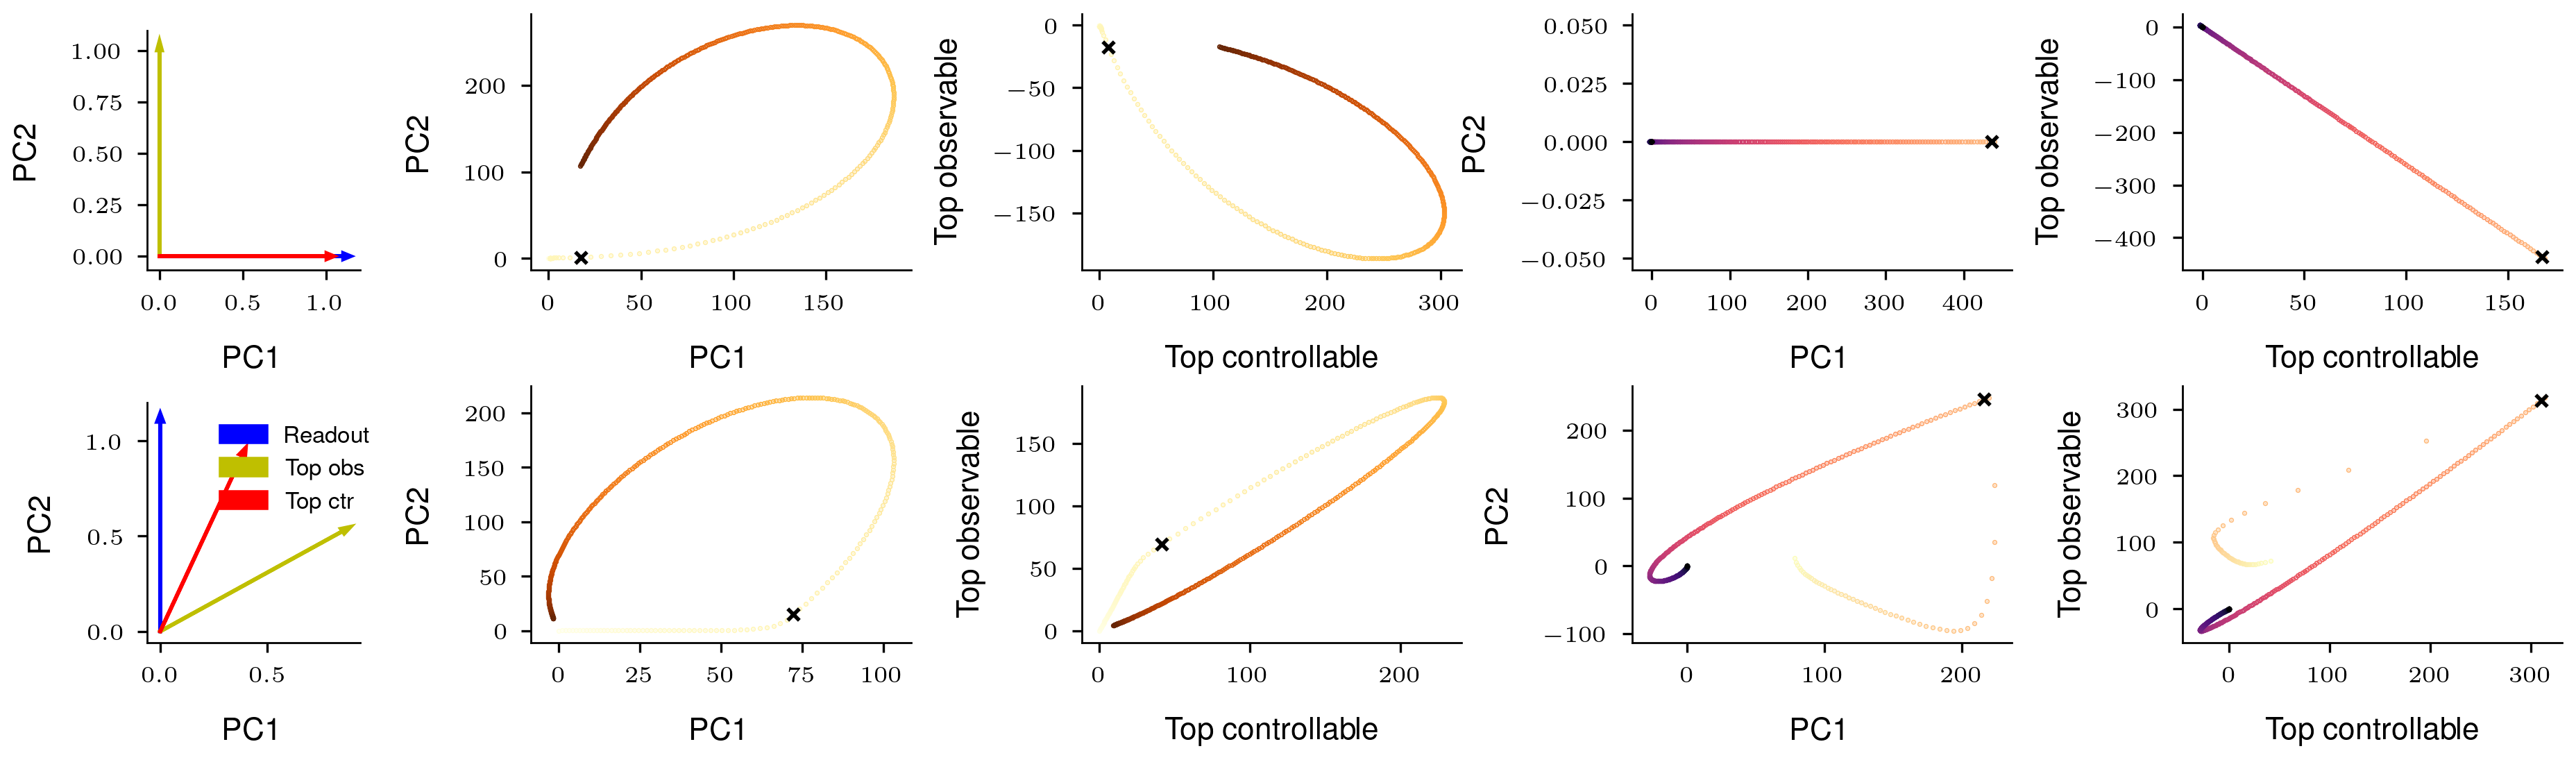

In [ ]:

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
t_prep = 100


####C aligned along diff mode
proj_obs = get_proj_obs(diff_dir, t_prep)
proj_ctr = get_proj_ctr(diff_dir, t_prep)

fig, axes = plt.subplots(2,5, figsize=(12,3),dpi=400)
plt.subplots_adjust(hspace=0.45, wspace=0.45)
palette = sns.color_palette("YlOrBr",int(t_prep/2)+300)
palette_u = sns.color_palette("magma_r",int(t_prep/2)+300)
for i in range(np.shape(get_projs(diff_dir,t_prep))[0]):
    axes[0,1].scatter(get_projs(diff_dir,t_prep)[i,0], get_projs(diff_dir,t_prep)[i,1], color=palette[i], s=0.1)
axes[0,1].scatter(get_projs(diff_dir,t_prep)[int(t_prep/2),0], get_projs(diff_dir,t_prep)[int(t_prep/2),1], c='k', marker="x")
axes[0,1].set_xlabel("PC1")
axes[0,1].set_ylabel("PC2")



for i in range(np.shape(get_projs(sum_dir, t_prep))[0]):
    axes[0,2].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette[i], s=0.1)
axes[0,2].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[0,2].set_xlabel("Top controllable")
axes[0,2].set_ylabel("Top observable")

##########U projections
proj_obs = get_proj_obs(diff_dir, t_prep, "u")
proj_ctr = get_proj_ctr(diff_dir, t_prep, "u")
for i in range(np.shape(get_projs(diff_dir,t_prep))[0]):
    axes[0,3].scatter(get_projs(diff_dir,t_prep, "u")[i,0], get_projs(diff_dir,t_prep, "u")[i,1], color=palette_u[i], s=0.1)
axes[0,3].scatter(get_projs(diff_dir,t_prep, "u")[int(t_prep/2),0], get_projs(diff_dir,t_prep, "u")[int(t_prep/2),1], c='k', marker="x")
axes[0,3].set_xlabel("PC1")
axes[0,3].set_ylabel("PC2")



for i in range(np.shape(get_projs(sum_dir, t_prep))[0]):
    axes[0,4].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette_u[i], s=0.1)
axes[0,4].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[0,4].set_xlabel("Top controllable")
axes[0,4].set_ylabel("Top observable")


###C aligned along sum mode
proj_obs = get_proj_obs(sum_dir, t_prep)
proj_ctr = get_proj_ctr(sum_dir, t_prep)

for i in range(np.shape(get_projs(sum_dir,t_prep))[0]):
    axes[1,1].scatter(get_projs(sum_dir,t_prep)[i,0], get_projs(sum_dir,t_prep)[i,1], color=palette[i], s=0.1)
axes[1,1].scatter(get_projs(sum_dir,t_prep)[int(t_prep/2),0], get_projs(sum_dir,t_prep)[int(t_prep/2),1], c='k', marker="x")
axes[1,1].set_xlabel("PC1")
axes[1,1].set_ylabel("PC2")


for i in range(np.shape(get_projs(diff_dir, t_prep))[0]):
    axes[1,2].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette[i], s=0.1)
axes[1,2].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[1,2].set_xlabel("Top controllable")
axes[1,2].set_ylabel("Top observable")

##########U projections
proj_obs = get_proj_obs(sum_dir, t_prep, "u")
proj_ctr = get_proj_ctr(sum_dir, t_prep, "u")
for i in range(np.shape(get_projs(sum_dir,t_prep))[0]):
    axes[1,3].scatter(get_projs(sum_dir,t_prep, "u")[i,0], get_projs(sum_dir,t_prep, "u")[i,1], color=palette_u[i], s=0.1)
axes[1,3].scatter(get_projs(sum_dir,t_prep, "u")[int(t_prep/2),0], get_projs(sum_dir,t_prep, "u")[int(t_prep/2),1], c='k', marker="x")
axes[1,3].set_xlabel("PC1")
axes[1,3].set_ylabel("PC2")



for i in range(np.shape(get_projs(sum_dir, t_prep))[0]):
    axes[1,4].scatter(-proj_ctr[i,0], -proj_obs[i,0], color=palette_u[i], s=0.1)
axes[1,4].scatter(-proj_ctr[int(t_prep/2),0], -proj_obs[int(t_prep/2),0], c='k', marker="x")
axes[1,4].set_xlabel("Top controllable")
axes[1,4].set_ylabel("Top observable")



# axes[0,0].arrow(0,0,1,1, head_width = 0.03)

###Plotting the arrows
pos0 = axes[0,0].get_position()
axes[0,0].set_position([pos0.x0 + 0.05, pos0.y0, pos0.width - 0.05, pos0.height - 0.02])
axes[0,0].arrow(0,0,1.1,0, head_width = 0.03, color="b", label="Readout")
axes[0,0].arrow(0,0,0,1, head_width = 0.03, color="y", label="Top observable")
axes[0,0].arrow(0,0,1,0, head_width = 0.03, color="red", label="Top controllable")
axes[0,0].set_xlabel("PC1")
axes[0,0].set_ylabel("PC2")
###Projs along sum mode
pos1 = axes[1,0].get_position()
axes[1,0].set_xlabel("PC1")
axes[1,0].set_ylabel("PC2")
axes[1,0].set_position([pos1.x0 + 0.05, pos1.y0, pos1.width - 0.05, pos1.height - 0.02])
obs_modes = np.loadtxt(f"{sum_dir}/obs_modes_x_{t_prep}")
ctr_modes = np.loadtxt(f"{sum_dir}/ctr_modes_x_{t_prep}")
axes[1,0].arrow(0,0,0,1.1, head_width = 0.03, color="b", label="Readout")
axes[1,0].arrow(0,0,-obs_modes[0,0], -obs_modes[0,1],  head_width = 0.03,color="y",label="Top obs")
axes[1,0].arrow(0,0,-ctr_modes[0,0], -ctr_modes[0,1],  head_width = 0.03,color="red",label="Top ctr")
axes[1,0].legend(loc = (0.3,0.5))
fig.savefig("2D_figs/nonnorm_projs.pdf", format = "pdf", bbox_inches='tight')

105199.25551569414 324.34434713078343 13178.30259067339
2056062.1825278678 1433.8975495229315 12896.923065794927
6714984.40914914 2591.3286956982397 12209.515540461416
15221469.29787244 3901.470145710773 10816.796502842708
20933208.384714365 4575.28232841585 8709.415171836345
20231110.531571846 4497.900680492161 8269.404124889035
19251037.87176407 4387.6004685663975 7903.333755777438
16194900.312820092 4024.288795901717 7150.344500898175


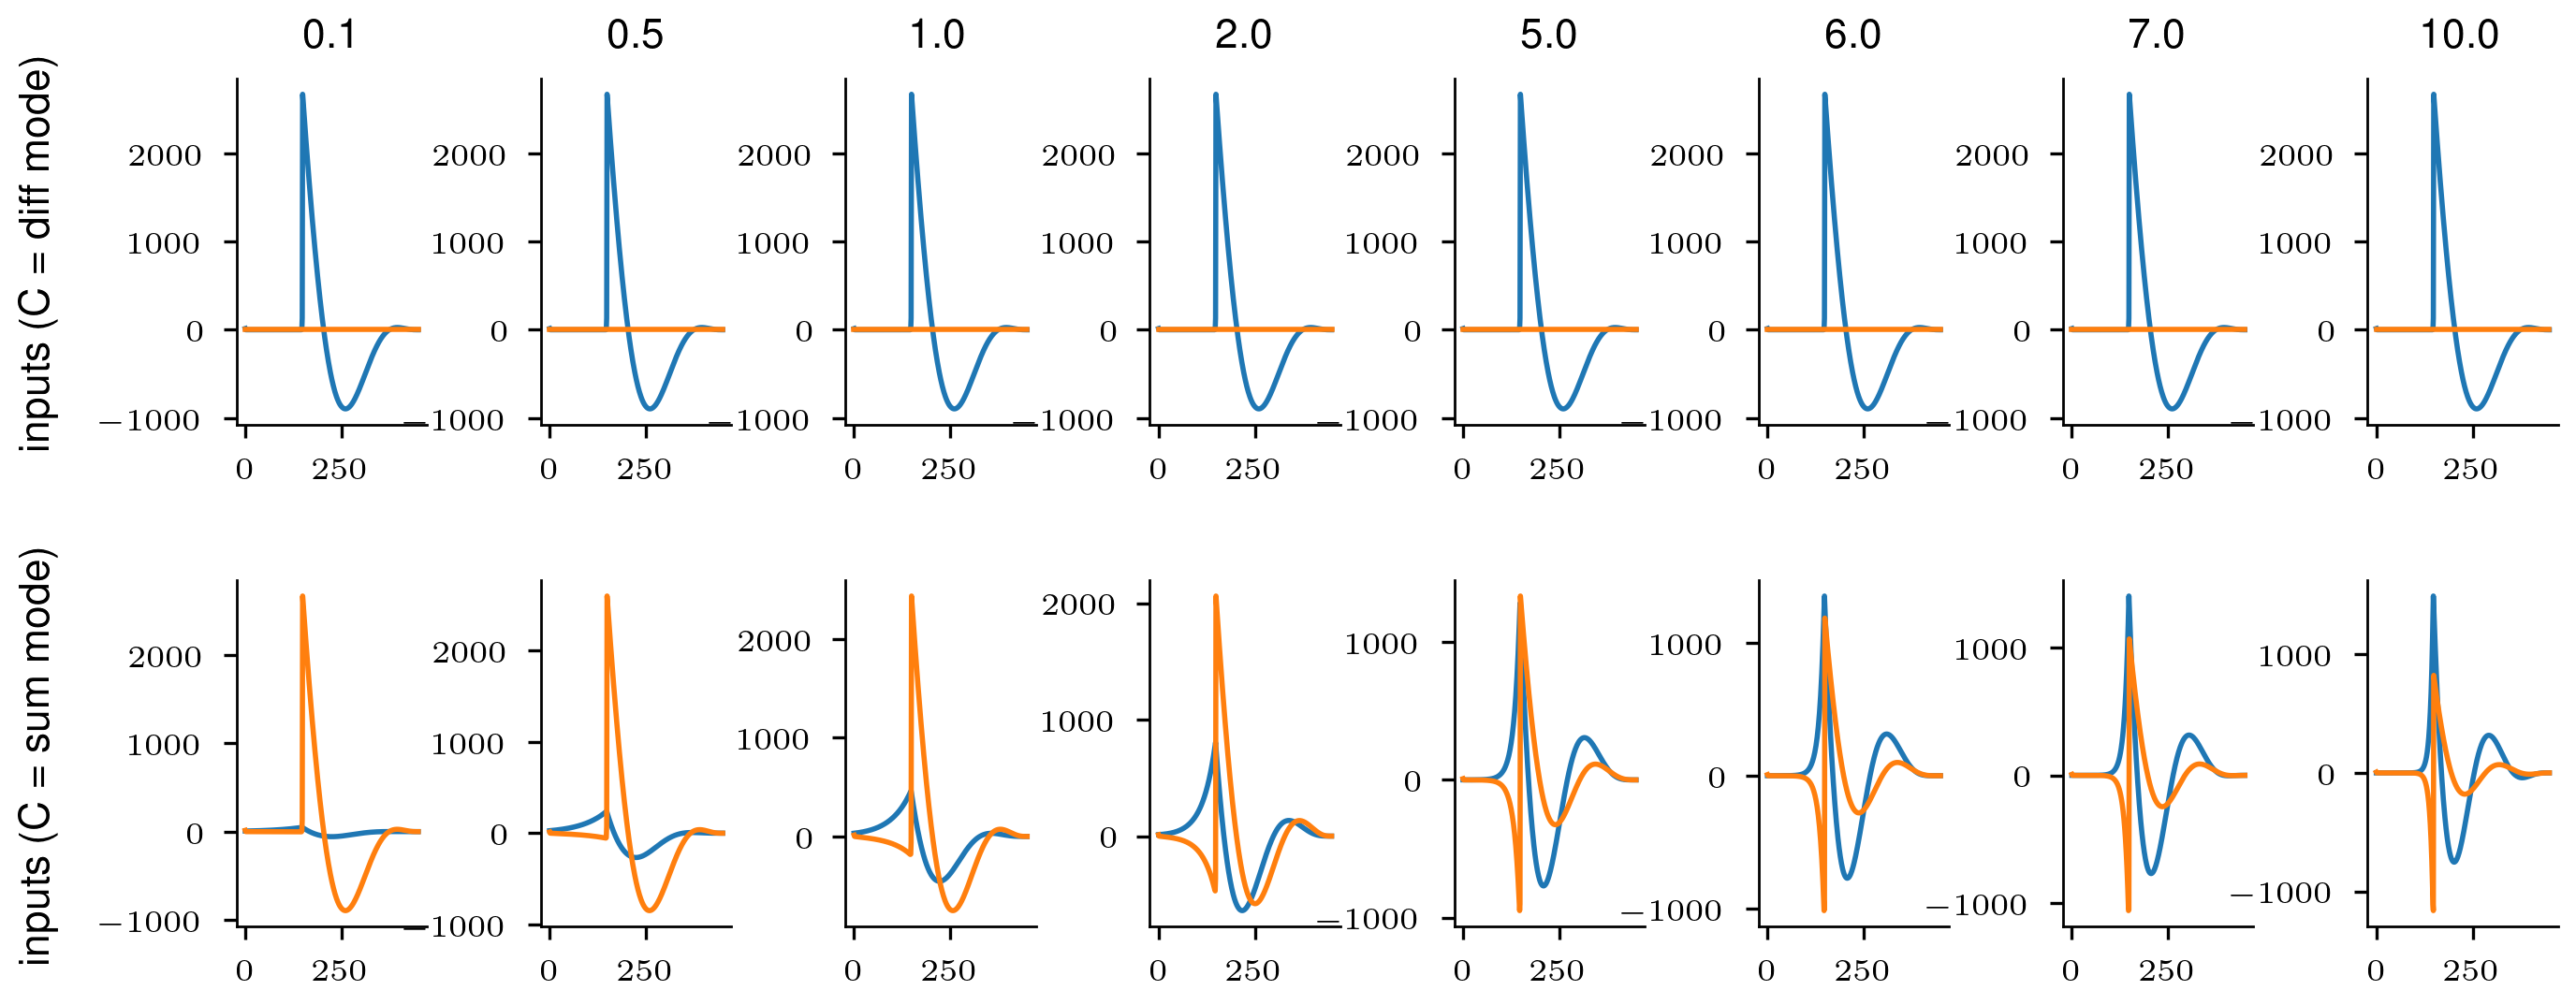

In [ ]:
def get_dir(c=1):
    return f"/home/mmcs3/code/why-prep-2/2D_nets/nonnormal/c_{c}"

def get_us(rad, c):
    dir = get_dir(c)
    return np.loadtxt(f"{dir}/us_{rad}_{c}")

fig, axes = plt.subplots(2,8, figsize=(8,3),dpi=400)
plt.subplots_adjust(hspace=0.45, wspace=0.6)
t_prep = 300
def prep_idx(rad, c):
    u0 = get_us(rad, 0)
    us = get_us(rad, c)
    us_prep = us[:149]
    us_mov = us[149:]
    return np.linalg.norm(us_prep)**2
    #np.linalg.norm(us_mov)**2*np.linalg.norm(u0)**2
for (i,r) in enumerate([0.1, 0.5, 1.0, 2.0, 5.0, 6.0, 7.0, 10.0]):
    pi0 = prep_idx(r,0)
    pi4 = prep_idx(r, 4)
    axes[0,i].plot(get_us(r, 0), label=f"w = {r}")
    axes[1,i].plot(get_us(r,4))
    axes[0, i].set_title(f"{r}")
    print(pi4, np.linalg.norm(get_us(r,4)[:149]), np.linalg.norm(get_us(r,4)[149:]))
axes[0,0].set_ylabel("inputs (C = diff mode)")
axes[1,0].set_ylabel("inputs (C = sum mode)")
fig.savefig("2D_figs/nonnorm_vary_w.pdf", format = "pdf", bbox_inches='tight')


In [ ]:
dir_non = f"/home/mmcs3/code/why-prep-2/2D_nets/nonnormal"
dir_skew = f"/home/mmcs3/code/why-prep-2/2D_nets/skew3"
def get_us(dir, rad, c=0):
    return np.loadtxt(f"{dir}/c_{c}/us_{rad}_{c}")

def get_rates(dir, rad, c=0):
    return np.loadtxt(f"{dir}/c_{c}/rates_{rad}_{c}")

def get_position(dir, rad, c=0):
    return np.loadtxt(f"{dir}/c_{c}/thetas_{rad}_{c}")

def get_torques(dir, rad, c=0):
    return np.loadtxt(f"{dir}/c_{c}/torques_{rad}_{c}")

def get_projs(dir, rad, c=0, mode="x"):
    return np.loadtxt(f"{dir}/c_{c}/proj_modes_{mode}_300")

def get_proj_ctr(dir, rad, c=0,mode="x"):
    return np.loadtxt(f"{dir}/c_{c}/proj_ctr_{mode}_300")

def get_proj_obs(dir, rad, c=0, mode="x"):
    return np.loadtxt(f"{dir}/c_{c}/proj_obs_{mode}_300")

rads = [0.0,0.1,0.4,0.5,0.8,1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0]
def norm_u_prep(dir,c):
    pis = []
    for r in rads:
        us = get_us(dir,r,c)[:149,:]
        pis.append(np.linalg.norm(us)/149/2)
    return np.asarray(pis)

def prep_idces(dir,c):
    pis = []
    for r in rads:
        us_prep = get_us(dir,r,c)[:149,:]
        us_mov = get_us(dir,r,c)[149:,:]
        pis.append(np.linalg.norm(us_prep)/np.linalg.norm(us_mov))
    return np.asarray(pis)
c=0
np.loadtxt(f"{dir_non}/c_{c}/proj_modes_x_300")

array([[ 0.00000e+00,  0.00000e+00],
       [ 1.88805e-01,  0.00000e+00],
       [ 1.97411e-01,  2.51740e-02],
       [ 1.96992e-01,  5.11598e-02],
       [ 1.96123e-01,  7.67433e-02],
       [ 1.95232e-01,  1.01870e-01],
       [ 1.94340e-01,  1.26542e-01],
       [ 1.93449e-01,  1.50767e-01],
       [ 1.92559e-01,  1.74550e-01],
       [ 1.91670e-01,  1.97897e-01],
       [ 1.90781e-01,  2.20815e-01],
       [ 1.89893e-01,  2.43308e-01],
       [ 1.89006e-01,  2.65383e-01],
       [ 1.88120e-01,  2.87045e-01],
       [ 1.87234e-01,  3.08301e-01],
       [ 1.86349e-01,  3.29155e-01],
       [ 1.85465e-01,  3.49612e-01],
       [ 1.84582e-01,  3.69680e-01],
       [ 1.83699e-01,  3.89362e-01],
       [ 1.82818e-01,  4.08663e-01],
       [ 1.81937e-01,  4.27590e-01],
       [ 1.81056e-01,  4.46147e-01],
       [ 1.80176e-01,  4.64339e-01],
       [ 1.79297e-01,  4.82172e-01],
       [ 1.78419e-01,  4.99649e-01],
       [ 1.77542e-01,  5.16776e-01],
       [ 1.76665e-01,  5.33558e-01],
 

FileNotFoundError: /home/mmcs3/code/why-prep-2/2D_nets/skew3/c_1/us_0.0_1 not found.

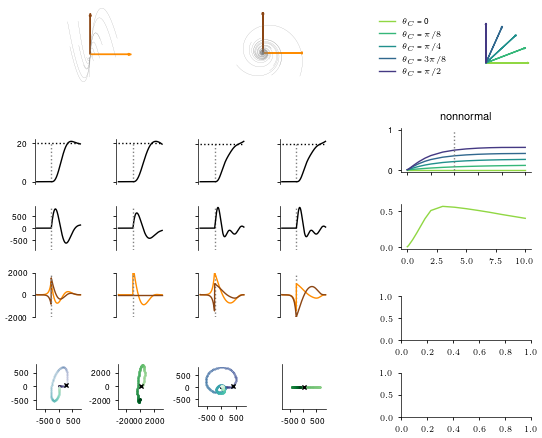

In [ ]:
import numpy as np
import numpy 
fig = plt.figure(figsize=(8,5), constrained_layout=False, dpi=100)
# gridspec inside gridspec
t_prep = 300
gs = fig.add_gridspec(6, 8, wspace=0.7, hspace=0.5)
delta_pcy = 0.05
'''Top panel 1'''
ax_col1 = fig.add_subplot(gs[1,0:2])
pos1 = ax_col1.get_position()
ax_col1.set_position([pos1.x0 - 0.02, pos1.y0, pos1.width + 0.05, 0.3*pos1.height])
#ax_col1.set_box_aspect(1)
ax_col1.spines['left'].set_visible(False)
ax_col1.set_xticks([])
ax_col1.set_yticks([])
color_u1 = "saddlebrown"
#ax_col1.set_xlim(-0.55,2.05)
# ax_col1.hlines(0.5, 0.2, 0.8, color = "k")
# ax_col1.hlines(-0.1, -0.5, 2, color = "k")
# ax_col1.vlines(-0.5, -0.1, -0.3, color = "k")
# ax_col1.vlines(2, -0.1, -0.3, color = "k")
ax_col1.spines['bottom'].set_visible(False)
'''Top panel 2'''
ax_col2 = fig.add_subplot(gs[1,2:4])
pos2 = ax_col2.get_position()
ax_col2.set_position([pos2.x0 - 0.02, pos2.y0, pos2.width + 0.05, 0.3*pos2.height])
# ax_col2.hlines(0.5, 0.2, 0.8, color = "k")
# ax_col2.hlines(-0.1, -0.5, 2, color = "k")
# ax_col2.vlines(-0.5, -0.1, -0.3, color = "k")
# ax_col2.vlines(2, -0.1, -0.3, color = "k")
ax_col2.spines['bottom'].set_visible(False)
ax_col2.spines['left'].set_visible(False)
ax_col2.set_xticks([])
ax_col2.set_yticks([])

axes1 = fig.add_subplot(gs[0,0:2])
pos = axes1.get_position()
axes1.set_position([pos.x0, pos.y0 - 0.07, pos.width, pos.width])
ratio = 1.0
x_left, x_right = axes1.get_xlim()
y_low, y_high = axes1.get_ylim()
axes1.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
#axes1.set_box_aspect(1)
#axes1.arrow(0,0,0,1.1, head_width = 0.03, color="b", label="Readout")

axes1.spines['left'].set_visible(False)
axes1.spines['bottom'].set_visible(False)
# axes1.set_xlabel("Neuron 1")
# axes1.set_ylabel("Neuron 2")
c_diff = 0
c_sum = 4
rad= 4.0
def norm_projs(i):
    m = numpy.loadtxt(f"/home/mmcs3/code/why-prep-2/2D_samples/nonnormal/c_4/proj_modes_x_{i}")
    range = True
    if numpy.max(numpy.abs(m)) > 1:
        range = False
    return m, range
for j in range(20):
    npp, r = norm_projs(j)
    axes1.plot(npp[:,0],npp[:,1], color='gray', linewidth = 0.12)
axes1.arrow(0,0,0,1, head_width = 0.05, color=color_u1)
axes1.arrow(0,0,1,0, head_width = 0.05, color="darkorange")
# axes1.set_xlim(-1.05,1.05)
# axes1.set_ylim(-1.05,1.05)
axes1.set_xticks([])
axes1.set_yticks([])


#ax_col1.set_box_aspect(1)
#circle1 = plt.Circle((0, 0), radius = 0.2, color='k', fill=False)
#circle2 = plt.Circle((1, 0), radius=0.2, color='k', fill=False)
#ax_col1.add_patch(circle1)
#ax_col1.add_patch(circle2)
#top_nn = fig.add_subplot(gs[0:2,0:2])
#top_skew = fig.add_subplot(gs[0:2,2:4])
pc_nn1 = fig.add_subplot(gs[5:,0])
pc_nn2 = fig.add_subplot(gs[5:,1])
pc_skew1 = fig.add_subplot(gs[5:,2])
pc_skew2 = fig.add_subplot(gs[5:,3])
# pos_nn = pc_nn.get_position()
#pc_nn.set_position([pos_nn.x0 + 0.03, pos_nn.y0 - 0.04, pos_nn.width - 0.06, pos_nn.height])
# pos_skew = pc_skew.get_position()
# pc_skew.set_position([pos_skew.x0 + 0.03, pos_skew.y0 - 0.04, pos_skew.width - 0.06, pos_skew.height])
pi_nn = fig.add_subplot(gs[1,4:6])
pi_skew = fig.add_subplot(gs[2,4:6])
ws_nn = fig.add_subplot(gs[3,4:6])
ws_skew = fig.add_subplot(gs[4,4:6])
axes_c = fig.add_subplot(gs[0,5])
pos_c = axes_c.get_position()
axes_c.set_position([pos_c.x0 + 0.05, pos_c.y0 - 0.03, pos_c.width, pos_c.height])
ax_posn1 = fig.add_subplot(gs[2,0])
ax_posn2 = fig.add_subplot(gs[2,1])
ax_posn2.vlines(150, 0, 20, color = "gray", linestyle = "dotted")
ax_posn1.vlines(150, 0, 20, color = "gray", linestyle = "dotted")
ax_posn1.spines['bottom'].set_visible(False)
ax_posn2.spines['bottom'].set_visible(False)
ax_tr1 = fig.add_subplot(gs[3,0])
ax_tr2 = fig.add_subplot(gs[3,1])
ax_tr1.spines['bottom'].set_visible(False)
ax_tr2.spines['bottom'].set_visible(False)
ax_in1 = fig.add_subplot(gs[4,0])
ax_in2 = fig.add_subplot(gs[4,1])
ax_in1.spines['bottom'].set_visible(False)
ax_in2.spines['bottom'].set_visible(False)
ax_poss1 = fig.add_subplot(gs[2,2])
ax_poss2 = fig.add_subplot(gs[2,3])
ax_poss1.spines['bottom'].set_visible(False)
ax_poss2.spines['bottom'].set_visible(False)
ax_poss2.vlines(150, 0, 20, color = "gray", linestyle = "dotted")
ax_poss1.vlines(150, 0, 20, color = "gray", linestyle = "dotted")
ax_trs1 = fig.add_subplot(gs[3,2])
ax_tr1.set_yticks([-500,0,500],[-500,0,500], fontsize = fs_m1)
ax_tr2.set_yticks([-500,0,500],[])
ax_tr2.set_ylim(-900,900)
ax_tr1.set_ylim(-900,900)
ax_trs2 = fig.add_subplot(gs[3,3])
ax_trs1.set_yticks([-500,0,500],[])
ax_trs2.set_yticks([-500,0,500],[])
ax_trs2.set_ylim(-900,900)
ax_trs1.set_ylim(-900,900)
ax_trs1.spines['bottom'].set_visible(False)
ax_trs2.spines['bottom'].set_visible(False)
ax_is1 = fig.add_subplot(gs[4,2])
ax_is2 = fig.add_subplot(gs[4,3])
ax_is1.spines['bottom'].set_visible(False)
ax_is2.spines['bottom'].set_visible(False)
pos_ws_nn = ws_nn.get_position()
ws_nn.set_position([pos_ws_nn.x0 + 0.05, pos_ws_nn.y0, pos_ws_nn.width, pos_ws_nn.height])
pos_ws_skew = ws_skew.get_position()
ws_skew.set_position([pos_ws_skew.x0 + 0.05, pos_ws_skew.y0, pos_ws_skew.width, pos_ws_skew.height])
pos_pi_nn = pi_nn.get_position()
pi_nn.set_position([pos_pi_nn.x0 + 0.05, pos_pi_nn.y0, pos_pi_nn.width, pos_pi_nn.height])
pos_pi_skew = pi_skew.get_position()
pi_skew.set_position([pos_pi_skew.x0 + 0.05, pos_pi_skew.y0, pos_pi_skew.width, pos_pi_skew.height])


#plot first column

ax_posn2.set_xticks([])
ax_posn1.set_yticks([0,20], [0,20])
ax_posn2.set_yticks([0,20],[])
ax_poss2.set_yticks([0,20],[])
ax_poss1.set_yticks([0,20],[])
ax_posn2.plot(get_position(dir_non,rad, c_diff)[:,0], 'k')
ax_posn2.hlines(20, 0, 450, color = "k", linestyle="dotted")
ax_posn1.set_xticks([])
# ax_posn1.set_ylabel("position")
ax_posn1.hlines(20, 0, 450, color = "k", linestyle="dotted")
ax_posn1.plot(get_position(dir_non,rad, c_sum)[:,0], 'k')
ax_tr2.set_xticks([])
ax_tr2.plot(get_torques(dir_non,rad, c_diff), 'k')
ax_tr1.set_xticks([])
# ax_tr1.set_ylabel("torques")
ax_tr1.plot(get_torques(dir_non,rad, c_sum), 'k')
ax_in1.set_xticks([], [])
ax_in1.plot(get_us(dir_non,rad, c_sum)[:,0],'darkorange')
ax_in1.plot(get_us(dir_non,rad, c_sum)[:,1],color_u1)
# ax_in1.set_ylabel("inputs")
ax_in2.plot(get_us(dir_non,rad, c_diff)[:,0],'darkorange')
ax_in2.plot(get_us(dir_non,rad, c_diff)[:,1],color_u1)
from matplotlib.patches import Rectangle
# fig.patches.extend([plt.Rectangle((0.225,0.218),0.03,0.004,
#                                   fill=True, color='gray', alpha=0.5, zorder=1000,
#                                   transform=fig.transFigure, figure=fig)])                               
ax_in2.set_xticks([], [])
ax_is1.set_xticks([], [])
ax_is2.set_xticks([], [])
ax_tr1.vlines(150, -900, 900, color="gray", linestyle="dotted")
ax_tr2.vlines(150, -900, 900, color="gray", linestyle="dotted")
ax_trs1.vlines(150,-900, 900, color="gray", linestyle="dotted")
ax_trs2.vlines(150, -900, 900, color="gray", linestyle="dotted")
ax_in1.vlines(150, -2000, 2000, color="gray", linestyle="dotted")
ax_in2.vlines(150, -2000, 2000, color="gray", linestyle="dotted")
ax_is1.vlines(150, -2000, 2000, color="gray", linestyle="dotted")
ax_is2.vlines(150, -2000, 2000, color="gray", linestyle="dotted")
# ax_posn1.vlines(150, 0, 20, color="gray", linestyle="dotted")
# ax_posn2.vlines(150, 0, 20, color="gray", linestyle="dotted")
# ax_poss1.vlines(150, 0, 20, color="gray", linestyle="dotted")
# ax_poss2.vlines(150, 0, 20, color="gray", linestyle="dotted")
#PC plot 
palette1 = sns.color_palette("mako", int(t_prep/2)+300)
#sns.light_palette("seagreen",int(t_prep/2)+300)
palette2 = sns.color_palette("Greens",int(t_prep/2)+300)
palettec = sns.color_palette("viridis_r",5)
ratio = 1.0
for i in range(np.shape(get_projs(dir_non,rad, c_sum))[0] - 1):
    pc_nn1.scatter(get_projs(dir_non,rad, c_sum)[i,0], get_projs(dir_non,rad, c_sum)[i,1], color=palette1[i], s=0.1, alpha=0.2)
pc_nn1.scatter(get_projs(dir_non,rad, c_sum)[int(t_prep/2),0], get_projs(dir_non,rad, c_sum)[int(t_prep/2),1], c='k', marker="x")
#pc_nn1.set_ylabel("neuron 2")
pc_nn1.set_xlim(-800,800)
pc_nn2.set_xlim(-3200,3200)
pc_nn2.set_ylim(-3200,3200)
pc_nn1.set_ylim(-800,800)
pc_nn1.set_xticks([-500, 0, 500],[-500, 0, 500], fontsize = fs_m1)
pc_nn1.set_yticks([-500, 0, 500], [-500, 0, 500], fontsize = fs_m1)
pc_nn2.set_xticks([-2000, 0, 2000],[-2000, 0, 2000], fontsize = fs_m1)
pc_nn2.set_yticks([-2000, 0, 2000], [-2000, 0, 2000], fontsize = fs_m1)
x_left, x_right = pc_nn1.get_xlim()
y_low, y_high = pc_nn1.get_ylim()
pc_nn1.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
pos_nn1 = pc_nn1.get_position()
pc_nn1.set_position([pos_nn1.x0, pos_nn1.y0 - delta_pcy, pos_nn1.width, pos_nn1.height])
for i in range(np.shape(get_projs(dir_non,rad, c_diff))[0]):
    pc_nn2.scatter(get_projs(dir_non,rad, c_diff)[i,0], get_projs(dir_non,rad, c_diff)[i,1], color=palette2[i], s=0.1)
pc_nn2.scatter(get_projs(dir_non,rad, c_diff)[int(t_prep/2),0], get_projs(dir_non,rad, c_diff)[int(t_prep/2),1], c='k', marker="x")
# pc_nn2.set_yticks([-2000, -1000, 0, 1000, 2000], [-2000, -1000, 0, 1000, 2000])
x_left, x_right = pc_nn2.get_xlim()
y_low, y_high = pc_nn2.get_ylim()
pc_nn2.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
pos_nn2 = pc_nn2.get_position()
pc_nn2.set_position([pos_nn2.x0, pos_nn2.y0 - delta_pcy, pos_nn2.width, pos_nn2.height])
####Skew symmetric network
ax_poss2.set_xticks([])
ax_poss2.plot(get_position(dir_skew,rad, c_diff)[:,0], 'k')
ax_poss2.hlines(20, 0, 450, color = "k", linestyle="dotted")
ax_poss1.set_xticks([])
ax_poss1.hlines(20, 0, 450, color = "k", linestyle="dotted")
ax_poss1.plot(get_position(dir_skew,rad, c_sum)[:,0], 'k')
ax_trs2.set_xticks([])
ax_trs2.plot(get_torques(dir_skew,rad, c_diff), 'k')
ax_trs1.set_xticks([])
ax_trs1.plot(get_torques(dir_skew,rad, c_sum), 'k')
ax_is1.set_xticks([], [])
ax_is1.plot(get_us(dir_skew,rad, c_sum)[:,0],'darkorange')
ax_is1.plot(get_us(dir_skew,rad, c_sum)[:,1],color_u1)
ax_is2.plot(get_us(dir_skew,rad, c_diff)[:,0],'darkorange')
ax_is2.plot(get_us(dir_skew,rad, c_diff)[:,1],color_u1)
ax_is2.set_xticks([], [])
ax_is1.set_yticks([-2000,0,2000], [])
ax_is2.set_yticks([-2000,0,2000], [])
ax_in2.set_yticks([-2000,0,2000], [])
ax_in1.set_yticks([-2000,0,2000], [-2000,0,2000], fontsize = fs_m1)
ax_is2.set_ylim(-2000,2000)
ax_is1.set_ylim(-2000,2000)
ax_in1.set_ylim(-2000,2000)
ax_in2.set_ylim(-2000,2000)
###########################
axes2 = fig.add_subplot(gs[0,2:4])
pos = axes2.get_position()
axes2.set_position([pos.x0, pos.y0 - 0.086, pos.width, pos.width])
x_left, x_right = axes2.get_xlim()
y_low, y_high = axes2.get_ylim()
axes2.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
axes2.set_xticks([])
axes2.set_yticks([])
axes2.spines['left'].set_visible(False)
axes2.spines['bottom'].set_visible(False)
# axes2.set_xlabel("Neuron 1")
axes2.set_xlim(-1.05,1.05)
axes2.set_ylim(-1.05,1.05)
def norm_projs(i):
    m = numpy.loadtxt(f"/home/mmcs3/code/why-prep-2/2D_samples/skew/c_4/proj_modes_x_{i}")
    range = True
    if numpy.max(numpy.abs(m)) > 1:
        range = False
    return m, range
for j in range(20):
    npp, r = norm_projs(j)
    axes2.plot(npp[:,0],npp[:,1], color='gray', linewidth = 0.12)
axes2.arrow(0,0,0,1, head_width = 0.05, color=color_u1)
#axes2.arrow(0,0,1,0, head_width = 0.03, color="g")
# axes2.set_xlabel("Neuron 1")
# axes2.set_ylabel("Neuron 2")
axes2.arrow(0,0,1,0, head_width = 0.05, color="darkorange", label="Top controllable")

# diff_projs = norm_projs[0:-2] - norm_projs[1:-1]
# axes2.arrow(norm_projs[-1,0], norm_projs[-1,1], color='gray')



##PC plots
for i in range(np.shape(get_projs(dir_skew,rad, c_diff))[0]):
    pc_skew1.scatter(get_projs(dir_skew,rad, c_sum)[i,0], get_projs(dir_skew,rad, c_sum)[i,1], color=palette1[i], s=0.1)
pc_skew1.scatter(get_projs(dir_skew,rad, c_sum)[int(t_prep/2),0], get_projs(dir_skew,rad, c_sum)[int(t_prep/2),1], c='k', marker="x")
pc_skew1.set_xticks([-500, 0, 500], [-500, 0, 500], fontsize = fs_m1)
pc_skew1.set_yticks([ -500, 0, 500], [ -500, 0, 500], fontsize = fs_m1)
pc_skew2.set_yticks([], [])
# pc_nn2.set_yticks([], [])
pos_skew1 = pc_skew1.get_position()
pc_skew1.set_position([pos_skew1.x0, pos_skew1.y0 - 0.05, pos_skew1.width, pos_skew1.height])
x_left, x_right = pc_skew1.get_xlim()
y_low, y_high = pc_skew1.get_ylim()
pc_skew1.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
pc_skew1.set_xlim(-800,850)
pc_skew2.set_xlim(-800,850)
pc_skew2.set_ylim(-800,850)
pc_skew1.set_ylim(-800,850)
for i in range(np.shape(get_projs(dir_skew,rad, c_diff))[0]):
    pc_skew2.scatter(get_projs(dir_skew,rad, c_diff)[i,0], get_projs(dir_skew,rad, c_diff)[i,1], color=palette2[i], s=0.1)
pc_skew2.scatter(get_projs(dir_skew,rad, c_diff)[int(t_prep/2),0], get_projs(dir_skew,rad, c_diff)[int(t_prep/2),1], c='k', marker="x")
#pc_skew2.set_xlabel("Neuron 1")
pc_skew2.set_xticks([-500, 0, 500], [-500, 0, 500], fontsize = fs_m1)
# pc_skew2.set_yticks([ -500, 0, 500], [ -500, 0, 500])
x_left, x_right = pc_skew2.get_xlim()
y_low, y_high = pc_skew2.get_ylim()
pc_skew2.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
pos_skew2 = pc_skew2.get_position()
pc_skew2.set_position([pos_skew2.x0, pos_skew2.y0 - 0.05, pos_skew2.width, pos_skew2.height])

c_labels=['0', '$\\pi/8$', '$\\pi/4$', '$3\\pi/8$', '$\\pi/2$']
for c in [0,1,2,3]:
    pi_nn.plot(rads, prep_idces(dir_non,c),color=palettec[c], label=f"$\\theta_C$ = {c_labels[c]}")

for c in [0,1,2,3, 4]:
    theta = np.pi*c/8
    axes_c.arrow(0,0, np.cos(theta),np.sin(theta), head_width = 0.03, color=palettec[c])
axes_c.spines['left'].set_visible(False)
axes_c.spines['bottom'].set_visible(False)
axes_c.set_xticks([],[])
axes_c.set_yticks([],[])
posnn = pi_nn.get_position()
pi_nn.set_position([posnn.x0, posnn.y0 - 0.11, posnn.width, posnn.height])
poss = pi_skew.get_position()
pi_skew.set_position([poss.x0, poss.y0 - 0.13, poss.width, poss.height])
posnn = ws_nn.get_position()
ws_nn.set_position([posnn.x0, posnn.y0 - 0.18, posnn.width, posnn.height])
poss = ws_skew.get_position()
ws_skew.set_position([poss.x0, poss.y0 - 0.20, poss.width, poss.height])
pi_nn.plot(rads, prep_idces(dir_non,4),color=palettec[4], label=f"$\\theta_C$ = {c_labels[4]}")
pi_nn.legend(loc = (-0.2, 2.1))
pi_nn.set_xticks([0,2,4,6,8,10],[])
pi_nn.set_yticks([0,1], [0,1], fontsize = fs_m1)
pi_nn.set_title("nonnormal")
pi_nn.vlines(4.0, 0, 1, color = "gray", linestyle = "dotted")
for c in [0,1,2,3, 4]:
    pi_skew.plot(rads, prep_idces(dir_skew,c),color=palettec[c],label=f"C = {c_labels[c]}")


# pi_skew.plot(rads, prep_idces(dir_skew,4),color=palettec[4], linestyle="dotted", label=f"C = {c_labels[4]}")
#pi_skew.legend()
# pi_skew.set_xticks([0,2,4,6,8,10], [0,2,4,6,8,10])
pi_skew.set_yticks([0,1], [0,1])
pi_skew.set_xticks([0,2,4,6,8,10],[])
# pi_skew.set_xlabel("W")
pi_skew.set_title("oscillatory")
pi_skew.vlines(4.0, 0, 1, color = "gray", linestyle = "dotted")

for c in [0,1,2,3,4]:
    ws_nn.plot(rads, norm_u_prep(dir_non,c),color=palettec[c])
ws_nn.vlines(4.0, 0, 22, color = "gray", linestyle = "dotted")
ws_nn.set_xticks([])
ws_nn.set_yticks([])
ws_nn.set_yticks([])
ws_nn.set_title("nonnormal")
c_labels=['0', '$\\pi/8$', '$\\pi/4$', '$3\\pi/8$', '$\\pi/2$']
for c in [0,1,2,3]:
    ws_skew.plot(rads, norm_u_prep(dir_skew,c),color=palettec[c],label=f"$\\theta_C$ = {c_labels[c]}")
ws_skew.plot(rads, norm_u_prep(dir_skew,4),color=palettec[4], linestyle="dotted", label=f"$\\theta_C$ = {c_labels[4]}")
# ws_skew.legend(loc = (0.1, -2.5))

ws_nn.set_xticks([0,2,4,6,8,10], [])
ws_skew.set_xticks([0,2,4,6,8,10], [0,2,4,6,8,10], fontsize = fs_m1)
ws_skew.set_yticks([])
ws_skew.set_xlabel("W")
ws_skew.set_title("oscillatory")
ws_skew.vlines(4.0, 0, 25, color = "gray", linestyle = "dotted")
# fig.text(0.28, 0.2, "time")
# fig.text(0.28, 0.01, "neuron 1", size = fs)
fig.text(0.05, 0.27, "inputs", rotation="vertical",  size = fs)
fig.text(0.05, 0.39, "acc.", rotation="vertical",  size = fs)
fig.text(0.05, 0.55, "position", rotation="vertical",  size = fs)
# fig.text(0.05, 0.06, "neuron 2", rotation="vertical",  size = fs)
fig.text(0.53, 0.17, "$\\|\\mathbf{u}\\|_{\\textrm{prep}}^2$", rotation="vertical", size = fs)
fig.text(0.53, 0.47, "prep. index", rotation="vertical",  size = fs)
# fig.text(0.05, 0.8, "\\textbf{A}", fontsize=fs)
fig.savefig("2D_figs/test_2D_fig.pdf", format = "pdf", bbox_inches='tight')